<a href="https://colab.research.google.com/github/ALK26/Projects/blob/master/Automobile_Fuel_Regression_%26_China_GDP_1960_2014.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Simple Linear Regression
#  to use scikit-learn to implement simple linear regression. 

# Importing Needed packages
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline


In [2]:
# Download a dataset that is related to fuel consumption and Carbon dioxide emission of cars. 
# Then, split data into training and test sets, create a model using training set, Evaluate the model using test set, and finally use model to predict unknown value

!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2020-09-01 17:02:43--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K   234KB/s    in 0.3s    

2020-09-01 17:02:44 (234 KB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [3]:
# Understanding the Data - FuelConsumption.csv:
# have downloaded a fuel consumption dataset, FuelConsumption.csv, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles..
# ..for retail sale in Canada. Dataset source - http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64

# MODELYEAR e.g. 2014
# MAKE e.g. Acura
# MODEL e.g. ILX
# VEHICLE CLASS e.g. SUV
# ENGINE SIZE e.g. 4.7
# CYLINDERS e.g 6
# TRANSMISSION e.g. A6
# FUEL CONSUMPTION in CITY(L/100 km) e.g. 9.9
# FUEL CONSUMPTION in HWY (L/100 km) e.g. 8.9
# FUEL CONSUMPTION COMB (L/100 km) e.g. 9.2
# CO2 EMISSIONS (g/km) e.g. 182 --> low --> 0

# Reading the data in
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
# Data Exploration - first have a descriptive exploration on data.

# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:
# select some features to explore more.

cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


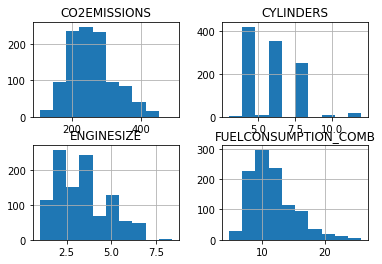

In [6]:
# can plot each of these fearues:

viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

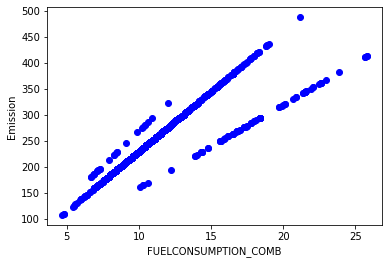

In [7]:
# plot each of these features vs the Emission, to see how linear is their relation:

# plot fuelconsumption vs the Emission, to see how linear is their relation:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

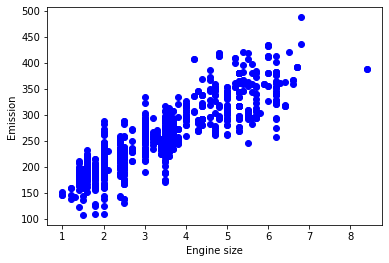

In [8]:
# plot ENGINESIZE vs the Emission, to see how linear is their relation:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

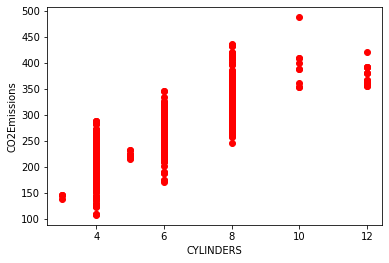

In [9]:
# plot CYLINDER vs the Emission, to see how linear is their relation:

plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color="red")
plt.xlabel("CYLINDERS")
plt.ylabel("CO2Emissions")
plt.show()

In [10]:
# Creating train and test dataset
# Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. 
# After which, train with the training set and test with the testing set. 
# This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. 
# It is more realistic for real world problems.

# it means that we know the outcome of each data point in this dataset, making it great to test with 
# And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

# split the dataset into train and test sets, 80% of the entire data for training, and the 20% for testing. create a mask to select random rows using np.random.rand() function:

msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

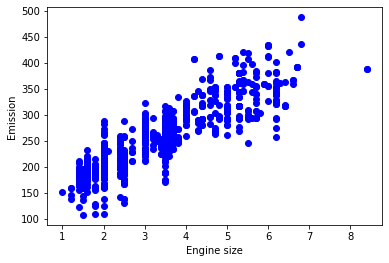

In [11]:
# Simple Regression Model - Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation.

# Train data distribution
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [12]:
# Modeling - Using sklearn package to model data.

from sklearn import linear_model
regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

regr.fit (train_x, train_y)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

# Coefficient and Intercept in the simple linear regression, are the parameters of the fit line. 
# Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, 
# sklearn can estimate them directly from our data.
# Notice that all of the data must be available to traverse and calculate the parameter

Coefficients:  [[39.27742474]]
Intercept:  [124.28576355]


Text(0, 0.5, 'Emission')

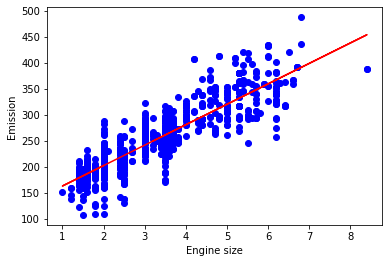

In [13]:
# plot outputs - can plot the fit line over the data:

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [14]:
# Evaluation - compare the actual values and predicted values to calculate the accuracy of a regression model. 
# Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

# There are different model evaluation metrics, use MSE here to calculate the accuracy of model based on the test set: 
# - Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error. 
# - Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. 
# This is due to the squared term exponentially increasing larger errors in comparison to smaller ones. 
# - Root Mean Squared Error (RMSE). - R-squared is not error, but is a popular metric for accuracy of model. It represents how close the data are to the fitted regression line. 
# The higher the R-squared, the better the model fits the data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).


In [15]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 21.97
Residual sum of squares (MSE): 832.29
R2-score: 0.71


In [16]:
# Multiple Linear Regression
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


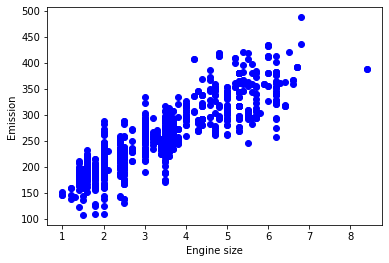

In [17]:
# plot Emission values with respect to Engine size:

plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [18]:
# Creating train and test dataset
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

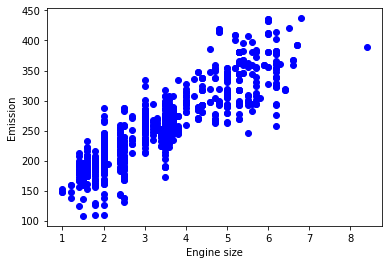

In [19]:
# Train data distribution
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [20]:
# Multiple Regression Model - 

# In reality, there are multiple variables that predict the Co2emission. When more than one independent variable is present, the process is called multiple linear regression. 
# For example, predicting co2emission using FUELCONSUMPTION_COMB, EngineSize and Cylinders of cars. 
# The good thing here is that Multiple linear regression is the extension of simple linear regression model.

from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)

# The coefficients
print ('Coefficients: ', regr.coef_)    


# As mentioned before, Coefficient and Intercept , are the parameters of the fit line. Given that it is a multiple linear regression, with 3 parameters,.. 
# ..and knowing that the parameters are the intercept and coefficients of hyperplane, sklearn can estimate them from our data. 
# Scikit-learn uses plain Ordinary Least Squares method to solve this problem.

Coefficients:  [[11.66952306  7.27428606  9.34206444]]


In [21]:
# Ordinary Least Squares (OLS) - OLS is a method for estimating the unknown parameters in a linear regression model. 
# OLS chooses the parameters of a linear function of a set of explanatory variables by minimizing the sum of the squares of the differences between the target dependent variable and those 
# predicted by linear function. tries to minimizes the sum of squared errors (SSE) or mean squared error (MSE) between target variable (y) and predicted output ( 𝑦̂  ) over all samples in dataset.
# OLS can find the best parameters using of the following methods: 
# - Solving the model parameters analytically using closed-form equations 
# - Using an optimization algorithm (Gradient Descent, Stochastic Gradient Descent, Newton’s Method, etc.)

# Prediction
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

#explained variance regression score:
# If  𝑦̂   is the estimated target output, y the corresponding (correct) target output, and Var is Variance, the square of the standard deviation, 
# then the explained variance is estimated as follow:
# 𝚎𝚡𝚙𝚕𝚊𝚒𝚗𝚎𝚍𝚅𝚊𝚛𝚒𝚊𝚗𝚌𝚎(𝑦,𝑦̂ )=1−𝑉𝑎𝑟{𝑦−𝑦̂ }𝑉𝑎𝑟{𝑦} 
# The best possible score is 1.0, lower values are worse.

Residual sum of squares: 531.85
Variance score: 0.86


In [22]:
# use a multiple linear regression with the same dataset but this time use __FUEL CONSUMPTION in CITY__ and __FUEL CONSUMPTION in HWY__ instead of FUELCONSUMPTION_COMB. 
# Does it result in better accuracy?

regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (x, y)
print ('Coefficients: ', regr.coef_)

y_= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']])
y = np.asanyarray(test[['CO2EMISSIONS']])

print("Residual sum of squares: %.2f"% np.mean((y_ - y) ** 2))
print('Variance score: %.2f' % regr.score(x, y))

Coefficients:  [[11.72981619  7.04546367  5.7084106   3.44109092]]
Residual sum of squares: 530.15
Variance score: 0.86


In [23]:
# Polynomial regression - sometimes, the trend of data is not really linear, and looks curvy. In this case we can use Polynomial regression methods. 
# many different regressions exist that can be used to fit whatever the dataset looks like, such as quadratic, cubic, and so on, and it can go on and on to infinite degrees.
# can call all of these, polynomial regression, where the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial in x. 

# example a polynomial regression (make 2 degree polynomial):
#𝑦=𝑏+𝜃1𝑥+𝜃2𝑥2 

# question is: how can fit data on this equation while have only x values, such as Engine Size? can create a few additional features: 1,  𝑥 , and  𝑥2 .
# PloynomialFeatures() function in Scikit-learn library, drives a new feature sets from the original feature set. 
# That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. 
# For example, say the original feature set has only one feature, ENGINESIZE. if select the degree of the polynomial to be 2, then it generates 3 features, degree=0, degree=1 and degree=2:

from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  2.  ,  4.  ],
       [ 1.  ,  1.5 ,  2.25],
       [ 1.  ,  3.5 , 12.25],
       ...,
       [ 1.  ,  3.  ,  9.  ],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.2 , 10.24]])

In [24]:
# fit_transform takes x values, and output a list of data raised from power of 0 to power of 2 (since set the degree of polynomial to 2).
# It looks like feature sets for multiple linear regression analysis. Indeed, Polynomial regression is a special case of linear regression, 
# with the main idea of how do select your features. Just consider replacing the  𝑥  with  𝑥1 ,  𝑥21  with  𝑥2 , and so on. Then the degree 2 equation would be turn into:
# 𝑦=𝑏+𝜃1𝑥1+𝜃2𝑥2 

# can deal with it as 'linear regression' problem. Therefore, this polynomial regression is considered to be a special case of traditional multiple linear regression. 
# So, can use the same mechanism as linear regression to solve such a problems.

# can use LinearRegression() function to solve it:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         49.62786367 -1.35324404]]
Intercept:  [107.54339918]


Text(0, 0.5, 'Emission')

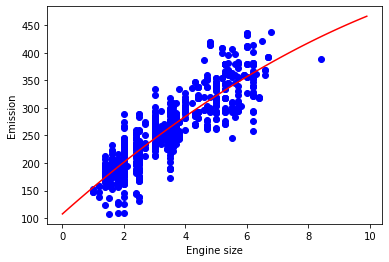

In [25]:
# ACoefficient and Intercept , are the parameters of the fit curvy line. Given that it is a typical multiple linear regression, with 3 parameters, 
# and knowing that the parameters are the intercept and coefficients of hyperplane, sklearn has estimated them from our new set of feature sets. 

# plot it:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [26]:
# Evaluation
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 24.86
Residual sum of squares (MSE): 1052.87
R2-score: 0.66


Coefficients:  [[ 0.         27.78279874  4.79914008 -0.52254432]]
Intercept:  [130.32839094]
Mean absolute error: 24.79
Residual sum of squares (MSE): 1047.70
R2-score: 0.66


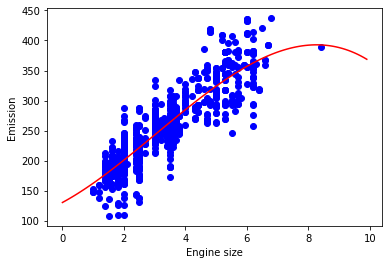

In [27]:
# use a polynomial regression with the dataset but this time with degree three (cubic). 
# Does it result in better accuracy?

poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(train_x)
clf3 = linear_model.LinearRegression()
train_y3_ = clf3.fit(train_x_poly3, train_y)

# The coefficients
print ('Coefficients: ', clf3.coef_)
print ('Intercept: ',clf3.intercept_)

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf3.intercept_[0]+ clf3.coef_[0][1]*XX + clf3.coef_[0][2]*np.power(XX, 2) + clf3.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

test_x_poly3 = poly3.fit_transform(test_x)
test_y3_ = clf3.predict(test_x_poly3)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y3_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y3_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y3_ , test_y) )

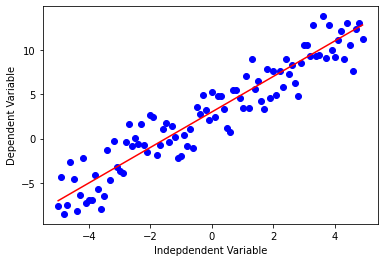

In [28]:
# Non Linear Regression Analysis
# If the data shows a curvy trend, then linear regression will not produce very accurate results when compared to a non-linear regression because, as the name implies,
# linear regression presumes that the data is linear. 

# Though Linear regression is very good to solve many problems, it cannot be used for all datasets. 
# First recall how linear regression, could model a dataset. It models a linear relation between a dependent variable y and independent variable x. 
# It had a simple equation, of degree 1, for example y =  2𝑥  + 3.

x = np.arange(-5.0, 5.0, 0.1)

# can adjust the slope and intercept to verify the changes in the graph
y = 2*(x) + 3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise

#plt.figure(figsize=(8,6))
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

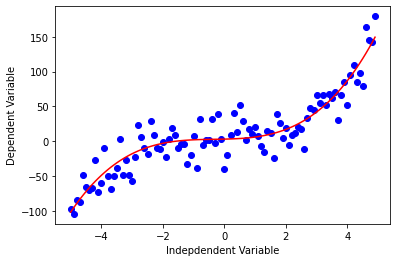

In [29]:
# Non-linear regressions are a relationship between independent variables  𝑥  and a dependent variable  𝑦  which result in a non-linear function modeled data. 
# Essentially any relationship that is not linear can be termed as non-linear, and is usually represented by the polynomial of  𝑘  degrees (maximum power of  𝑥 ).
# 𝑦=𝑎𝑥3+𝑏𝑥2+𝑐𝑥+𝑑 
# Non-linear functions can have elements like exponentials, logarithms, fractions, and others. For example:
# 𝑦=log(𝑥)
# Or more complicated such as :
# 𝑦=log(𝑎𝑥3+𝑏𝑥2+𝑐𝑥+𝑑)
 
# take a look at a cubic function's graph.

x = np.arange(-5.0, 5.0, 0.1)

# can adjust the slope and intercept to verify the changes in the graph
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

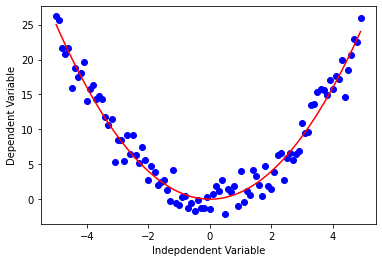

In [30]:
# As you can see, this function has  𝑥3  and  𝑥2  as independent variables. Also, the graphic of this function is not a straight line over the 2D plane. So this is a non-linear function.
# Some other types of non-linear functions are:
# Quadratic
# 𝑌=𝑋2

x = np.arange(-5.0, 5.0, 0.1)

# can adjust the slope and intercept to verify the changes in the graph

y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

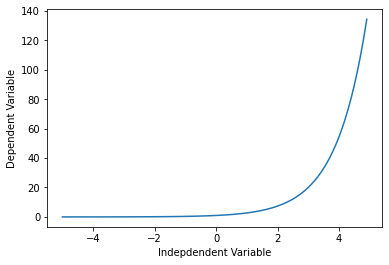

In [31]:
# Exponential
# An exponential function with base c is defined by
# 𝑌=𝑎+𝑏𝑐𝑋
# where b ≠0, c > 0 , c ≠1, and x is any real number. The base, c, is constant and the exponent, x, is a variable.

X = np.arange(-5.0, 5.0, 0.1)

# can adjust the slope and intercept to verify the changes in the graph

Y= np.exp(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


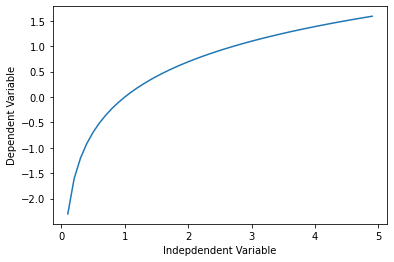

In [32]:
# Logarithmic
# The response  𝑦  is a results of applying logarithmic map from input  𝑥 's to output variable  𝑦 . It is one of the simplest form of log(): i.e.
# 𝑦=log(𝑥)
# consider that instead of  𝑥 , we can use  𝑋 , which can be polynomial representation of the  𝑥 's. In general form it would be written as
# 𝑦=log(𝑋)

X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

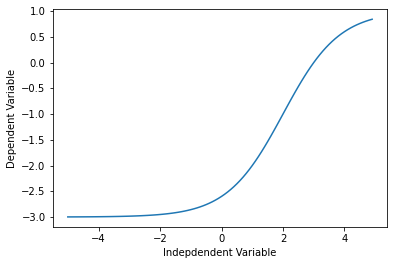

In [33]:
# Sigmoidal/Logistic
# 𝑌=𝑎+𝑏1+𝑐(𝑋−𝑑)

X = np.arange(-5.0, 5.0, 0.1)

Y = 1-4/(1+np.power(3, X-2))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [34]:
# Non-Linear Regression example

# try and fit a non-linear model to the datapoints corresponding to China's GDP from 1960 to 2014. download a dataset with two columns, 
# the first, a year between 1960 and 2014, 
# the second, China's corresponding annual gross domestic income in US dollars for that year.

import numpy as np
import pandas as pd

#downloading dataset
!wget -nv -O china_gdp.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv

df = pd.read_csv("china_gdp.csv")
df.head(10)

2020-09-01 17:02:49 URL:https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


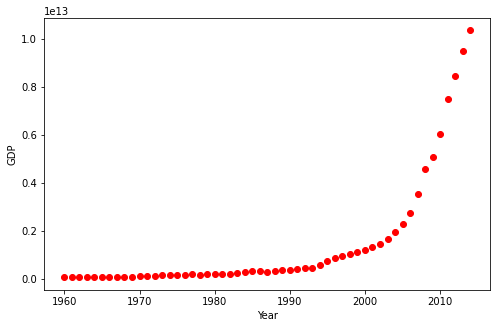

In [35]:
# Plotting the Dataset
# This is what the datapoints look like. It kind of looks like an either logistic or exponential function. 
# The growth starts off slow, then from 2005 on forward, the growth is very significant. And finally, it decelerate slightly in the 2010s.

plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

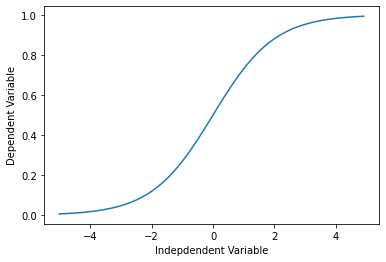

In [36]:
# Choosing a model
# From an initial look at the plot, we determine that the logistic function could be a good approximation, 
# since it has the property of starting with a slow growth, increasing growth in the middle, and then decreasing again at the end; as illustrated below:

X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [37]:
# The formula for the logistic function is the following:
# 𝑌̂ =11+𝑒𝛽1(𝑋−𝛽2)
# 𝛽1 : Controls the curve's steepness,
# 𝛽2 : Slides the curve on the x-axis.

# Building The Model -  build regression model and initialize its parameters.
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

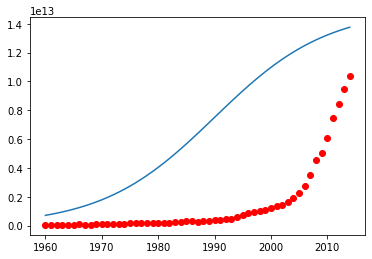

In [38]:
# look at a sample sigmoid line that might fit with the data:

beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

In [39]:
# task here is to find the best parameters for our model. first normalize our x and y:

# normalize data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [40]:
# How to find the best parameters for our fit line?
# can use curve_fit which uses non-linear least squares to fit sigmoid function, to data. 
# Optimal values for the parameters so that the sum of the squared residuals of sigmoid(xdata, *popt) - ydata is minimized.

# popt are our optimized parameters.

from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)

#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.453017, beta_2 = 0.997207


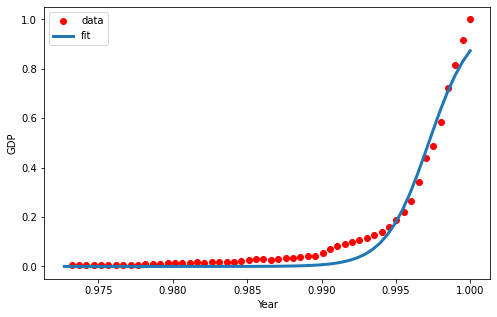

In [41]:
# Now plot resulting regression model.

x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [42]:
# calculate what is the accuracy of model?

# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))

from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y))

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: 0.97


In [43]:
# split data into train/test

msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))

from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: 0.97
